In [56]:
#libraries
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt
import math as math
from scipy.optimize import root_scalar

In [79]:
#Arguments used to calculate Ne
#20000 human genes, each human gene is a linkage block
totallinkageblocks = 20000
chromosomenumber=23

N=200
humanUd = [2.0, 10.0]
Kimetalsd=0.009
Boykoetalsd=0.029

In [61]:
#function returns Ne as in Matheson and Masel 2024. 
#r=2 per chromosome, two recombination events for chromosome arm
def calculate_Ne(Ud, sh, totallinkageblocks, chromosomenumber, N):
  Ne = N*np.exp(-8*Ud*(1-(1/totallinkageblocks))*sh)*np.exp(-Ud/(chromosomenumber*2))
  return Ne

#working on this, check that the signs of the math work first
def PfixDFE(x, Ud, sd, totallinkageblocks, chromosomenumber, N):
  Ne = calculate_Ne(Ud, sd, totallinkageblocks, chromosomenumber, N)
  Pfix = (1-np.exp(-2*(-x)))/(1-np.exp(-4*Ne*(-x)))
  DFE = np.exp(-x/(sd))/sd
  return Pfix*DFE

def calculate_PfixDFE(Ud, sd, totallinkageblocks, chromosomenumber, N):
  result = integrate.quad(PfixDFE, 0, 1, args=(Ud, sd, totallinkageblocks, chromosomenumber, N))
  return abs(result[0])

#Next function has to be zero to find the point where deterministic and stochastic accumulation equals each other
def calculate_stochastic_contribution(Ud, sd, totallinkageblocks, chromosomenumber, N):
  stochastic_contribution = N*calculate_PfixDFE(Ud, sd, totallinkageblocks, chromosomenumber, N)
  return stochastic_contribution


#working on this, check that the signs of the math work first
def NPfix(Ud, sd, totallinkageblocks, chromosomenumber, N):
  Ne = calculate_Ne(Ud, sd, totallinkageblocks, chromosomenumber, N)
  Pfix = (1-np.exp(-2*(-sd)))/(1-np.exp(-4*Ne*(-sd)))
  return N*Pfix

def calculate_NPfix(Ud, sd, totallinkageblocks, chromosomenumber, N):
  result = NPfix(Ud, sd, totallinkageblocks, chromosomenumber, N)
  return result

#Next function has to be zero to find the point where deterministic and stochastic accumulation equals each other
def calculate_deterministic_contribution(Ud, sh, totallinkageblocks, chromosomenumber, N):
  deterministic_contribution = 1-(1/(4.9*np.sqrt(Ud*sh)))
  return deterministic_contribution


#Next function has to be zero to find the point where deterministic and stochastic accumulation equals each other
def calculate_difference_equation(Ud, sd, totallinkageblocks, chromosomenumber, N):
  deterministic_contribution = calculate_deterministic_contribution(Ud, sd, totallinkageblocks, chromosomenumber, N)
  stochastic_contribution = calculate_stochastic_contribution(Ud, sd, totallinkageblocks, chromosomenumber, N)
  difference = deterministic_contribution-stochastic_contribution
  return difference

def find_Udroot_difference(sd, totallinkageblocks, chromosomenumber, N, lowerbracket, upperbracket):
  result =root_scalar(lambda Ud: calculate_deterministic_contribution(Ud, sd, totallinkageblocks, chromosomenumber, N), method='brentq', bracket=[lowerbracket, upperbracket])
  return result.root

/tmp/ipykernel_112365/747395791.py:10: RuntimeWarning: overflow encountered in exp
  Pfix = (1-np.exp(-2*(-x)))/(1-np.exp(-4*Ne*(-x)))


Text(0.5, 0, 'log10(sd)')

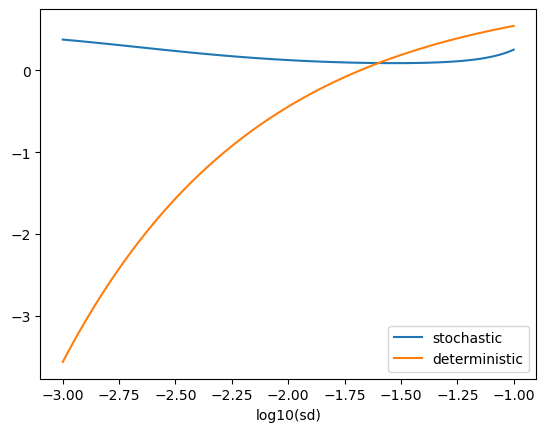

In [44]:
sd = 10**(np.linspace(start=-3, stop=-1, num=100))
Ud_test = 2
vStochastic_cont = np.vectorize(calculate_stochastic_contribution)
stochastic_cont = vStochastic_cont(Ud_test, sd, totallinkageblocks, chromosomenumber, N)
deterministic_cont = calculate_deterministic_contribution(Ud_test, sd, totallinkageblocks, chromosomenumber, N)
log10sd = np.log10(sd)

plt.plot(log10sd, stochastic_cont, label = 'stochastic')
plt.plot(log10sd, deterministic_cont, label = 'deterministic')
plt.legend()
plt.xlabel('log10(sd)')


/tmp/ipykernel_112365/747395791.py:10: RuntimeWarning: overflow encountered in exp
  Pfix = (1-np.exp(-2*(-x)))/(1-np.exp(-4*Ne*(-x)))


Text(0, 0.5, 'deterministic minus stochastic contribution')

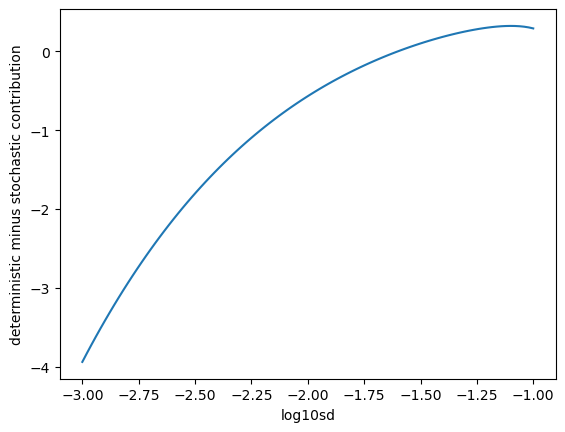

In [45]:
sd = 10**(np.linspace(start=-3, stop=-1, num=100))
Ud_test = 2
vDifference = np.vectorize(calculate_difference_equation)
diff_stoch_det = vDifference(Ud_test, sd, totallinkageblocks, chromosomenumber, N)
log10sd = np.log10(sd)

plt.plot(log10sd, diff_stoch_det)
plt.xlabel('log10sd')
plt.ylabel('deterministic minus stochastic contribution')

/tmp/ipykernel_112365/747395791.py:10: RuntimeWarning: overflow encountered in exp
  Pfix = (1-np.exp(-2*(-x)))/(1-np.exp(-4*Ne*(-x)))


Text(0.5, 0, 'Ud')

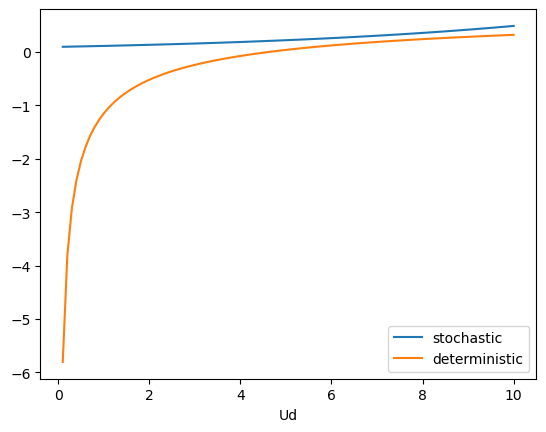

In [46]:
Ud = np.linspace(start=0.1, stop=10, num=100)
vStochastic_cont = np.vectorize(calculate_stochastic_contribution)
stochastic_cont = vStochastic_cont(Ud, Kimetalsd, totallinkageblocks, chromosomenumber, N)
deterministic_cont = calculate_deterministic_contribution(Ud, Kimetalsd, totallinkageblocks, chromosomenumber, N)

plt.plot(Ud, stochastic_cont, label = 'stochastic')
plt.plot(Ud, deterministic_cont, label = 'deterministic')
plt.legend()
plt.xlabel('Ud')


/tmp/ipykernel_112365/747395791.py:10: RuntimeWarning: overflow encountered in exp
  Pfix = (1-np.exp(-2*(-x)))/(1-np.exp(-4*Ne*(-x)))


Text(0.5, 0, 'Ud')

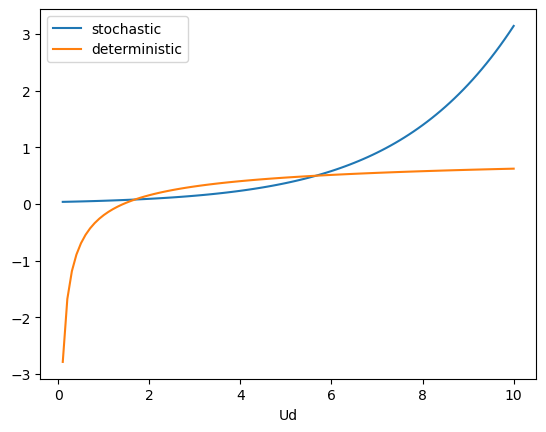

In [47]:
Ud = np.linspace(start=0.1, stop=10, num=100)
vStochastic_cont = np.vectorize(calculate_stochastic_contribution)
stochastic_cont = vStochastic_cont(Ud, Boykoetalsd, totallinkageblocks, chromosomenumber, N)
deterministic_cont = calculate_deterministic_contribution(Ud, Boykoetalsd, totallinkageblocks, chromosomenumber, N)

plt.plot(Ud, stochastic_cont, label = 'stochastic')
plt.plot(Ud, deterministic_cont, label = 'deterministic')
plt.legend()
plt.xlabel('Ud')

Text(0, 0.5, 'Ud')

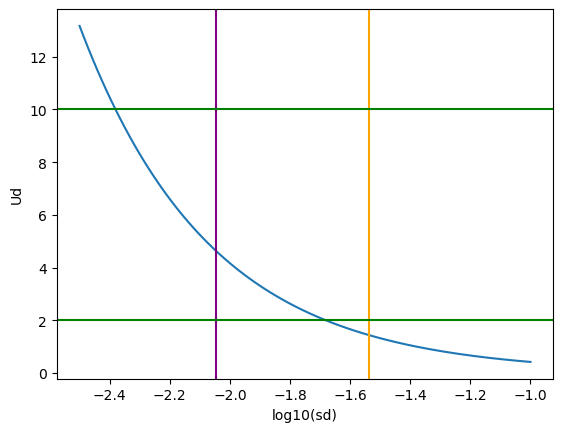

In [86]:
sd = 10**(np.linspace(start=-2.5, stop=-1, num=100))
vUdroot = np.vectorize(find_Udroot_difference)
Udroot = vUdroot(sd, totallinkageblocks, chromosomenumber, N, 0.1, 20)
log10sd = np.log10(sd)
log10Kim = np.log10(Kimetalsd)
log10Boyko = np.log10(Boykoetalsd)

plt.plot(log10sd, Udroot)
plt.axvline(x = log10Kim, color = 'purple', label = 'Kimetal')
plt.axvline(x = log10Boyko, color = 'orange', label = 'Boyko')
plt.axhline(y = humanUd[0], color = 'green', linestyle = '-') 
plt.axhline(y = humanUd[1], color = 'green', linestyle = '-') 
plt.xlabel('log10(sd)')
plt.ylabel('Ud')